# Exploratory Data Analysis

### Imports

In [2]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib import rcParams

# sns.set_theme(rc={'figure.figsize':(15,6)})
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("paper")
sns.set_theme(palette="flare", style='whitegrid', context='paper')

C = 'consensus_time'
F = 'opinion_change_frequency'

FEATURES = [
    'clustering', 'closeness', 'betweenness',
    'average_shortest_path_lenght', 'eigenvector', 'assortativity',
    'information_centrality',
    'approximate_current_flow_betweenness_centrality', 'shannon_entropy',
    'degree_variance'
]

UNCORRELATED_FEATURE_SUBSET = [
    'clustering',
    'closeness',
    'assortativity',
    'shannon_entropy'
]

In [4]:
dataset = pd.read_csv('../data/dataset.csv')
filtered_dataset = dataset.copy()
# filtered_dataset = dataset[dataset['initialization'] == 'random']
filtered_dataset.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,consensus_time,opinion_change_frequency,groups
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.134973,0.302541,1522.851944,4.044704,0.230008,-0.018908,0.003183,0.007993,2.980314,40.393910,6366.644719,1243.208393,2.326165
std,0.238810,0.101689,1150.783608,2.301567,0.173774,0.163433,0.000840,0.006716,1.209459,59.319039,14074.200627,2337.194329,1.637121
min,0.008343,0.096122,548.311000,2.095622,0.048632,-0.394020,0.001307,0.003230,0.377454,3.452053,14.380000,200.000000,0.000000
25%,0.023496,0.295643,1002.297000,3.003594,0.077858,-0.028178,0.002955,0.004962,2.621794,6.344289,354.175000,236.412500,1.000000
50%,0.026425,0.313753,1101.902500,3.202805,0.101251,-0.005222,0.003437,0.005224,3.645626,14.142136,502.895000,271.650000,2.000000
75%,0.032070,0.334657,1198.729000,3.396458,0.400133,0.117593,0.003652,0.005652,3.832035,32.907699,850.330000,405.840000,4.000000
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004290,0.027219,4.027738,204.959142,72565.190000,10212.310000,5.000000


In [5]:
dataset[['consensus_time', 'type']].pivot(columns='type').describe()

consensus_time                                              \
type  barabasi_linear barabasi_nonlinear_05 barabasi_nonlinear_15   
count       300.00000            300.000000            300.000000   
mean        424.81690            507.355700             90.605000   
std          73.66301             90.039503             43.814104   
min         292.18000            353.170000             14.380000   
25%         340.88000            403.680000             40.617500   
50%         443.66500            513.795000            101.495000   
75%         473.28000            603.107500            125.362500   
max         565.66000            646.530000            181.970000   

                                                
type   erdos_renyi watts-strogatz       waxman  
count   288.000000      300.00000   186.000000  
mean    580.189479    33376.66670   918.469892  
std     202.649954    14698.75175   480.252814  
min     329.780000     9398.07000   372.920000  
25%     378.387500    16198.71250   431.182500  
50%     548.735000    37191.94000   832.260000  
75%     711.182500    45053.43750  1264.050000  
max    1382.000000    72565.19000  2758.050000

In [6]:
measures_df = pd.read_csv('../data/measures.csv')

## Correlation Heatmap

In [7]:
from sklearn.metrics.pairwise import pairwise_distances
feature_correlation = pairwise_distances(dataset[FEATURES].T, metric='correlation')
feature_correlation = pd.DataFrame(feature_correlation, index=FEATURES)

In [8]:
filtered_dataset = dataset.copy()
filtered_dataset.describe()

,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,consensus_time,opinion_change_frequency,groups
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.134973,0.302541,1522.851944,4.044704,0.230008,-0.018908,0.003183,0.007993,2.980314,40.393910,6366.644719,1243.208393,2.326165
std,0.238810,0.101689,1150.783608,2.301567,0.173774,0.163433,0.000840,0.006716,1.209459,59.319039,14074.200627,2337.194329,1.637121
min,0.008343,0.096122,548.311000,2.095622,0.048632,-0.394020,0.001307,0.003230,0.377454,3.452053,14.380000,200.000000,0.000000
25%,0.023496,0.295643,1002.297000,3.003594,0.077858,-0.028178,0.002955,0.004962,2.621794,6.344289,354.175000,236.412500,1.000000
50%,0.026425,0.313753,1101.902500,3.202805,0.101251,-0.005222,0.003437,0.005224,3.645626,14.142136,502.895000,271.650000,2.000000
75%,0.032070,0.334657,1198.729000,3.396458,0.400133,0.117593,0.003652,0.005652,3.832035,32.907699,850.330000,405.840000,4.000000
max,0.652846,0.478556,4797.811000,10.594622,0.621034,0.204217,0.004290,0.027219,4.027738,204.959142,72565.190000,10212.310000,5.000000


<Axes: >

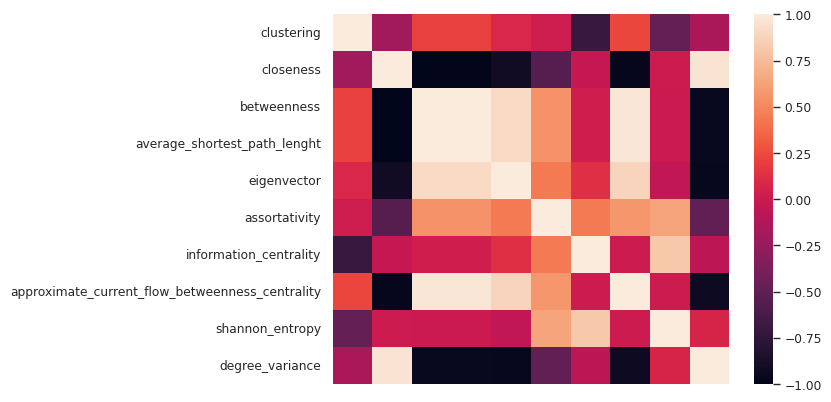

In [9]:
# sns.set_theme(rc={'figure.figsize':(10,7)})
sns.heatmap(
    filtered_dataset[FEATURES].corr(method='spearman'), 
    annot=False, vmax=1, vmin=-1, xticklabels=False)

We want to select subset of features with less correlation. We can see a strong correlation between Betweenness and Average Shortest Path Lenght, so only one of these should appear in the subset. Here, Im using a threshold of 95% according to Spearman Correlation coefficient.

It is also important to mantain a variety of measures. The subset chosen below includes centrality, information, clustering and others types of network measures.

**Features subset:** clustering, closeness, assortativity, shannon_entropy.

In [26]:
np.sum(np.abs(filtered_dataset[FEATURES].corr(method='spearman')))/len(FEATURES)

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


clustering                                         0.327791
closeness                                          0.661678
betweenness                                        0.661671
average_shortest_path_lenght                       0.661671
eigenvector                                        0.628069
assortativity                                      0.524284
information_centrality                             0.323510
approximate_current_flow_betweenness_centrality    0.654322
shannon_entropy                                    0.305431
degree_variance                                    0.655426
dtype: float64

/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/vitor/Documents/SznajdNetworks/venv/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

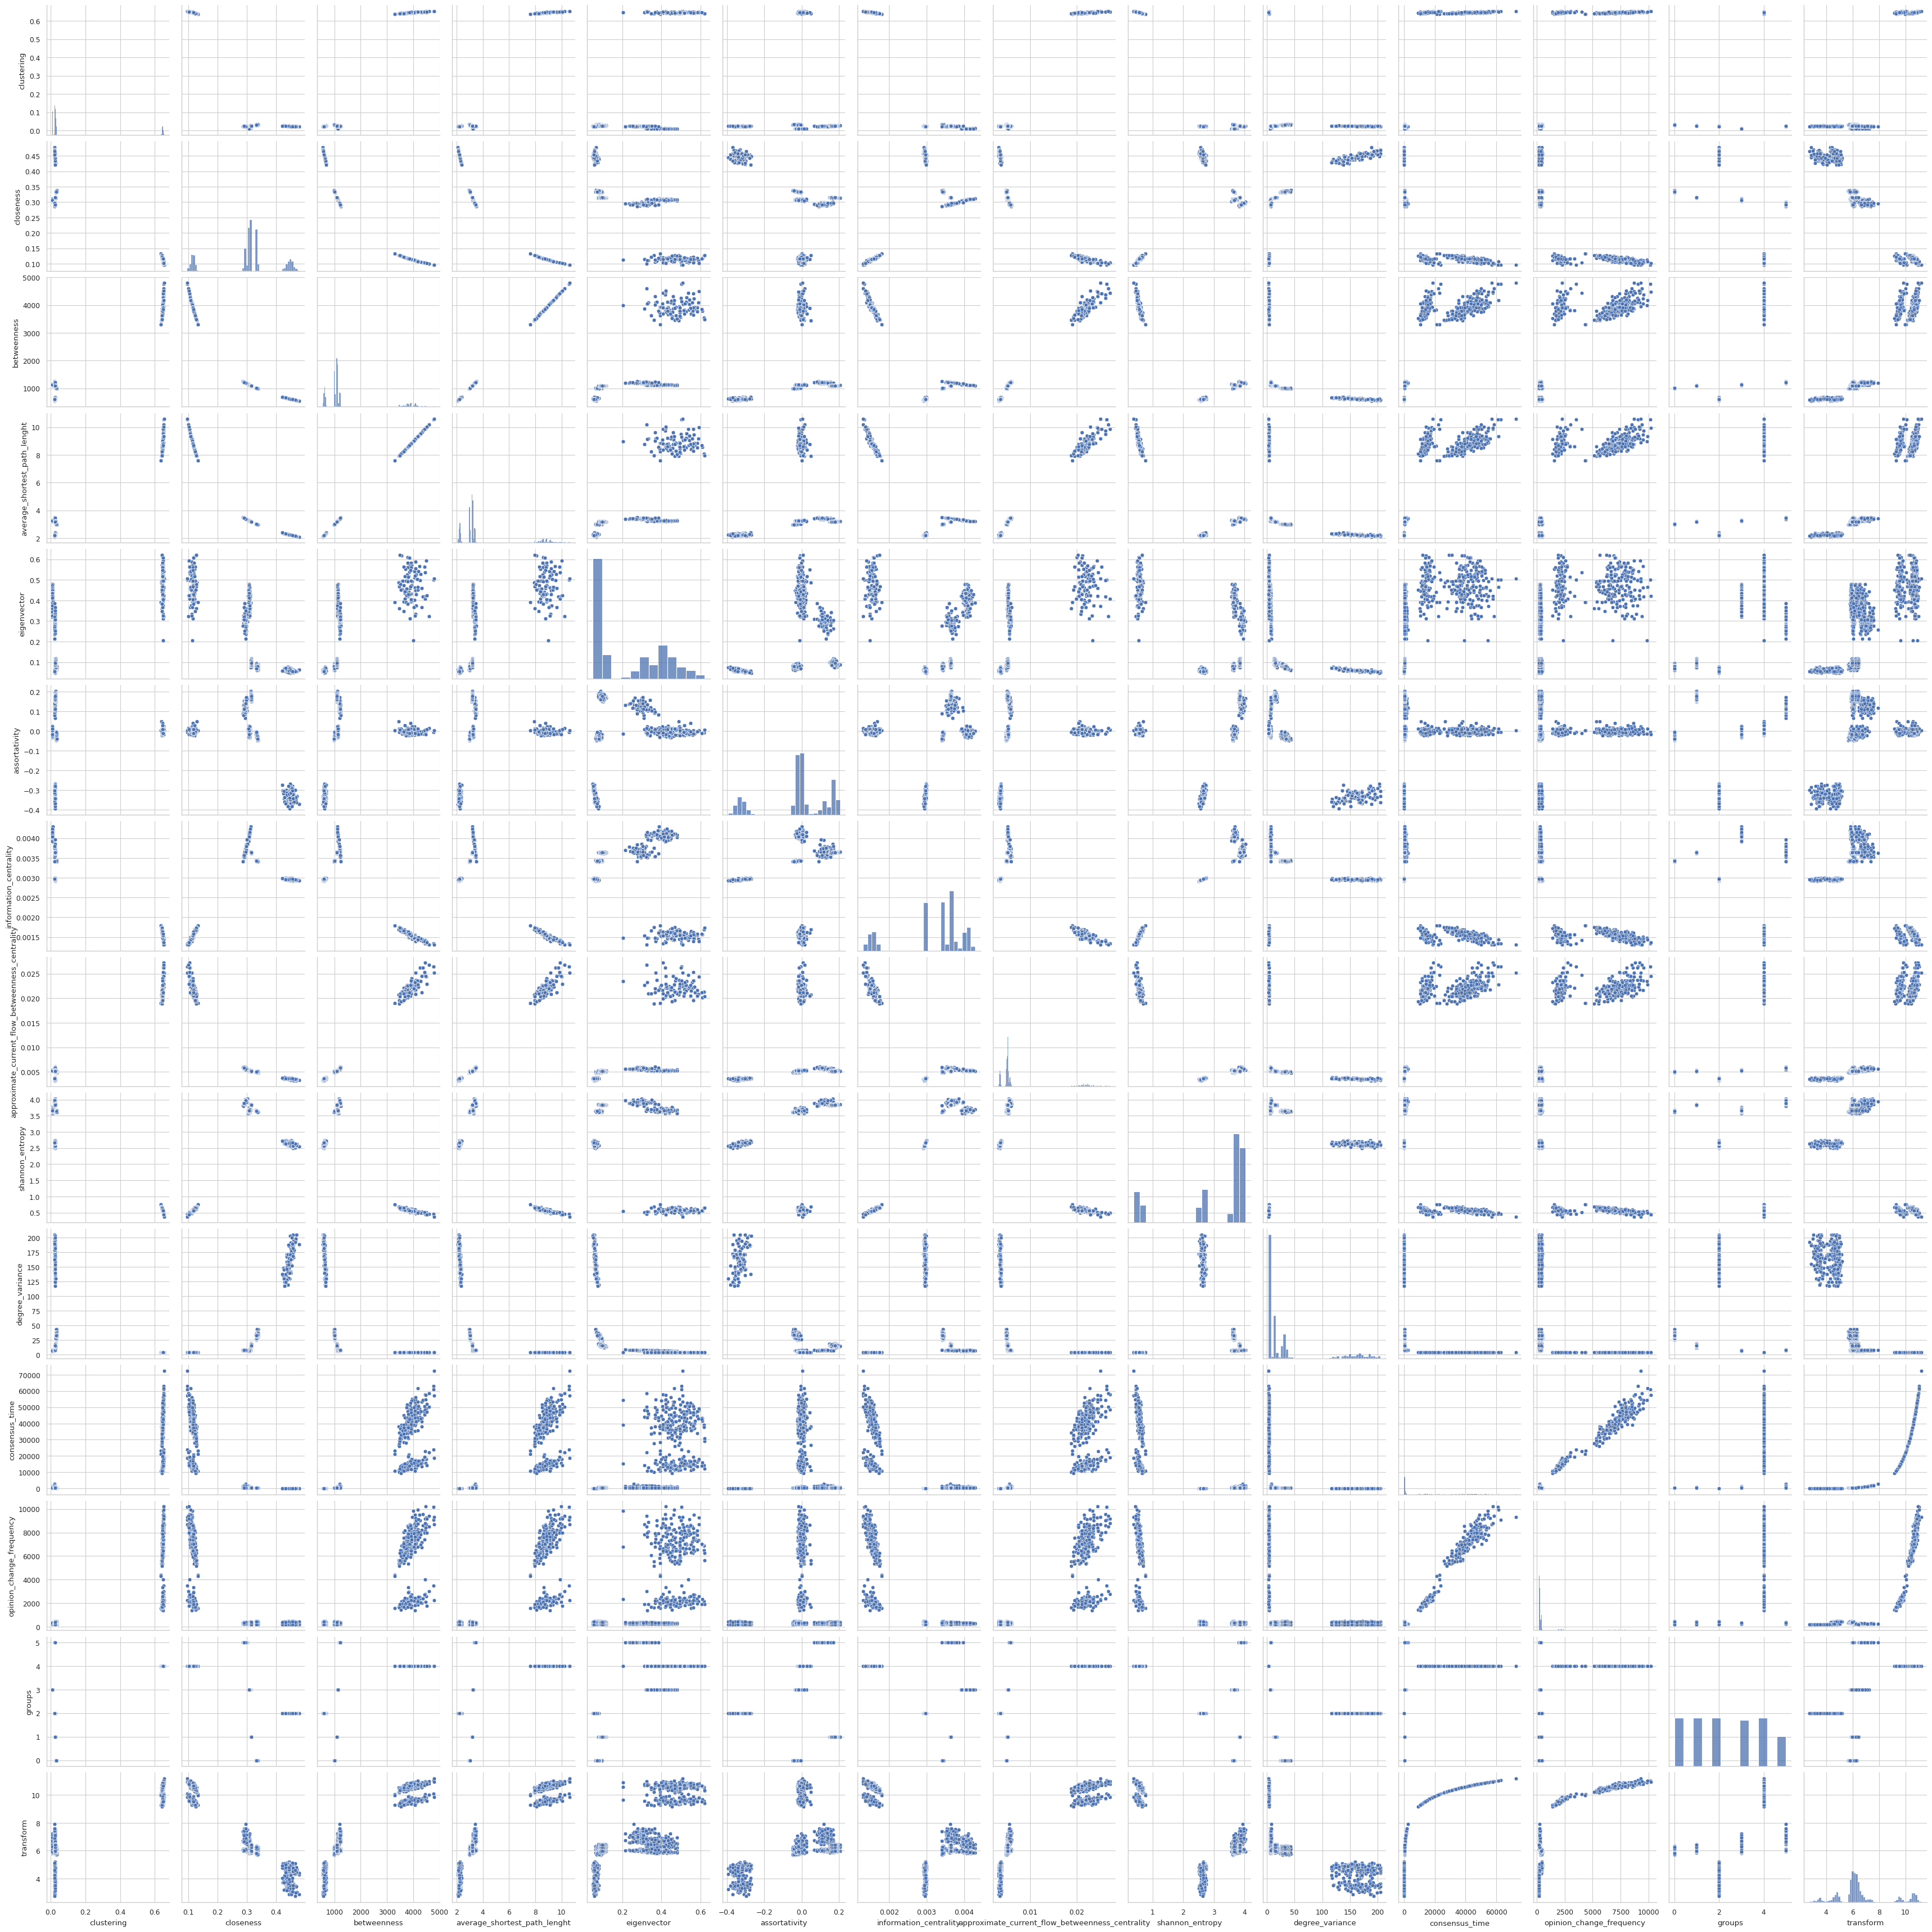

In [27]:
sns.pairplot(filtered_dataset, palette='magma')

In [24]:
filtered_dataset['transform'] = np.log1p(filtered_dataset['consensus_time'])

In [25]:
filtered_dataset

,network,type,clustering,closeness,betweenness,average_shortest_path_lenght,eigenvector,assortativity,information_centrality,approximate_current_flow_betweenness_centrality,shannon_entropy,degree_variance,initialization,consensus_time,opinion_change_frequency,groups,transform
0,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,random,471.08,248.74,0,6.157148
1,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,direct,535.92,200.00,0,6.285849
2,barabasi_linear_60.edgelist,barabasi_linear,0.032393,0.333205,1008.953,3.016906,0.082985,-0.012140,0.003442,0.005008,3.641398,28.577380,inverse,323.41,386.60,0,5.782008
3,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,random,431.67,248.66,0,6.069975
4,barabasi_linear_91.edgelist,barabasi_linear,0.032772,0.335566,998.585,2.996170,0.081414,-0.026616,0.003427,0.004956,3.629732,31.464265,direct,519.85,200.00,0,6.255462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,direct,41172.93,7879.43,4,10.625561
1670,watts-strogatz_76.edgelist,watts-strogatz,0.645758,0.117242,3798.980,8.596960,0.429491,0.008234,0.001636,0.021184,0.596770,3.452053,inverse,37483.28,6954.85,4,10.531677
1671,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,0.560623,3.452053,random,13790.04,1911.82,4,9.531774
1672,watts-strogatz_69.edgelist,watts-strogatz,0.646363,0.116023,3854.486,8.707972,0.606427,-0.011195,0.001584,0.021171,0.560623,3.452053,direct,43281.68,7024.76,4,10.675508


Text(0, 0.5, 'Consensus Time')

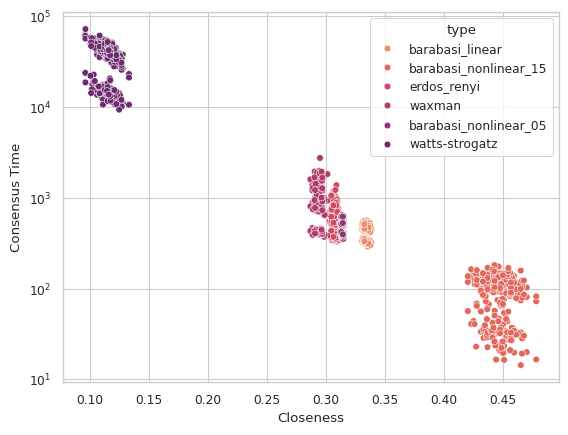

In [12]:
ax = sns.scatterplot(
    data=filtered_dataset,
    x=filtered_dataset['closeness'], 
    y=filtered_dataset['consensus_time'], 
    # line_kws=dict(color="r"), 
    hue='type'
)
ax.set_yscale('log')
ax.set_xlabel('Closeness')
ax.set_ylabel('Consensus Time')

In [51]:
dataset.pivot(columns='type')[['consensus_time']].describe()

consensus_time                                              \
type  barabasi_linear barabasi_nonlinear_05 barabasi_nonlinear_15   
count       300.00000            300.000000            300.000000   
mean        424.81690            507.355700             90.605000   
std          73.66301             90.039503             43.814104   
min         292.18000            353.170000             14.380000   
25%         340.88000            403.680000             40.617500   
50%         443.66500            513.795000            101.495000   
75%         473.28000            603.107500            125.362500   
max         565.66000            646.530000            181.970000   

                                                
type   erdos_renyi watts-strogatz       waxman  
count   288.000000      300.00000   186.000000  
mean    580.189479    33376.66670   918.469892  
std     202.649954    14698.75175   480.252814  
min     329.780000     9398.07000   372.920000  
25%     378.387500    16198.71250   431.182500  
50%     548.735000    37191.94000   832.260000  
75%     711.182500    45053.43750  1264.050000  
max    1382.000000    72565.19000  2758.050000

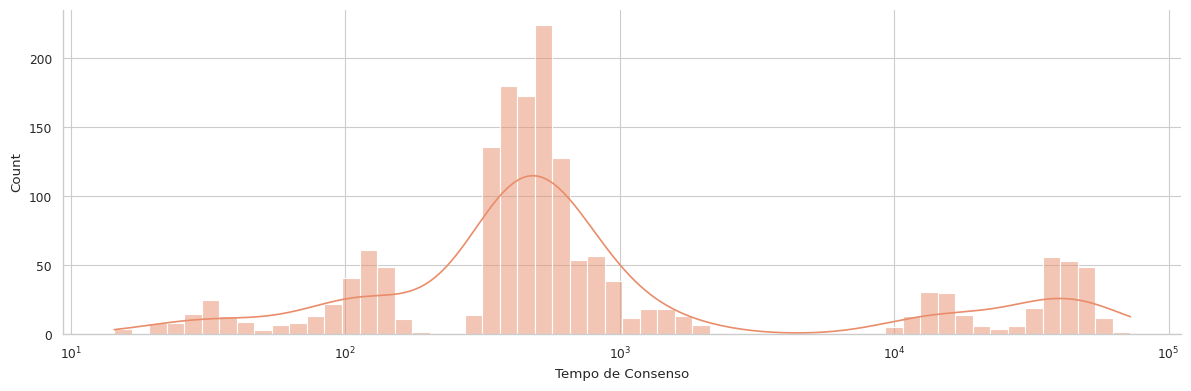

In [41]:
# sns.set_theme(rc={'figure.figsize':(15,6)})
ax = sns.displot(data=filtered_dataset, x='consensus_time', kde=True, log_scale=(True, False), height=4, aspect=3)
ax.set(xlabel='Tempo de Consenso')

In [62]:
from scipy import stats
dist = stats.nbinom

bounds = [(0, 100000), (0, 1)]
res = stats.fit(dist, filtered_dataset['consensus_time'], bounds)
res.params

FitParams(n=np.float64(1.0), p=np.float64(0.00015768587735137674), loc=np.float64(0.0))

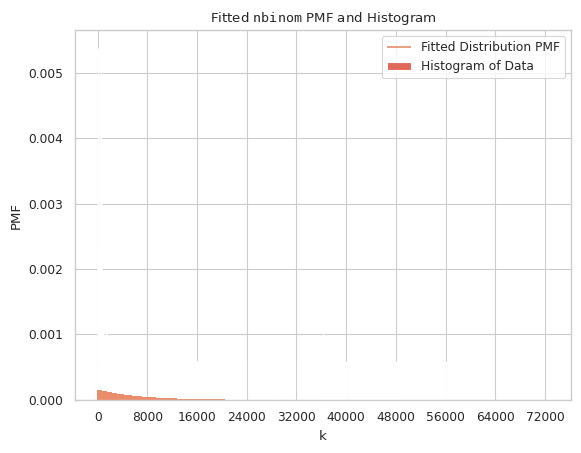

In [64]:
res.plot()
# plt.xscale('log')
plt.show()

## Networks Boxplots for each Measure

In [7]:
sns.set_theme(rc={'figure.figsize':(15,6)})

### Clustering
It is possible to see how Watts Strogatz networks presents elevated Clustering Coefficient

<Axes: xlabel='clustering'>

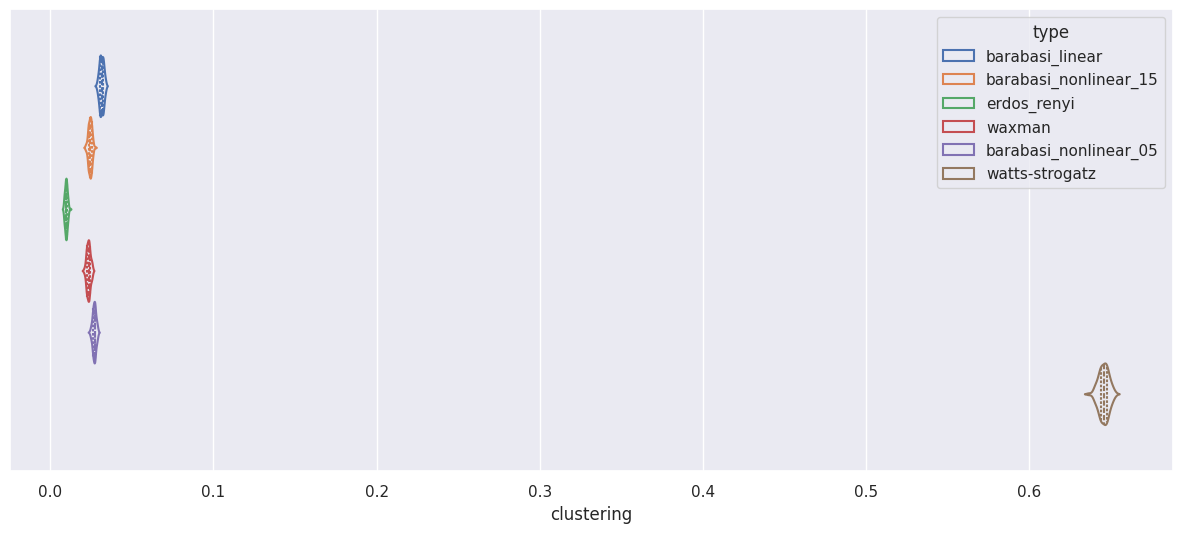

In [8]:
sns.violinplot(
    data=measures_df, 
    x="clustering", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Assortativity
The plot shows Barabasi Non-Linear with $p=1.5$ having negative assortativity, indicating the tendency of nodes to attach to different ones. There is a neutral pattern in Watts-Strogatz, Barabasi-Linear and Erdos Renyi graphs. At last, we see homophily happening with Waxman and Barabasi Non-Linear with $p=0.5$

<Axes: xlabel='assortativity'>

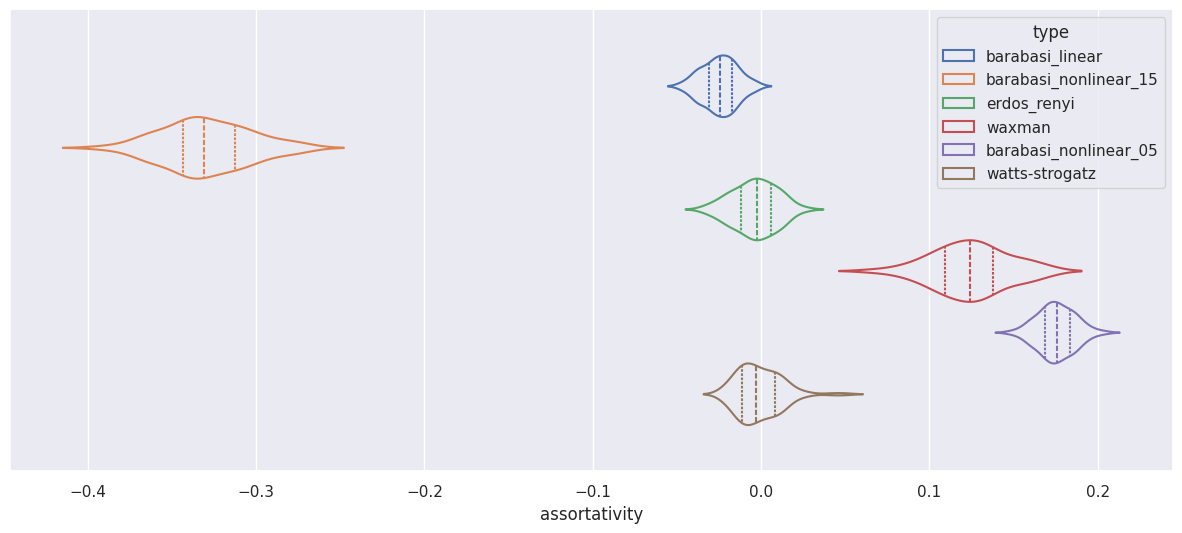

In [9]:
sns.violinplot(
    data=measures_df, 
    x="assortativity", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Closeness
At the extremes of the plot, we can see Watts-Strogatz networks having a smaller amount of central nodes and Barabasi Non-Linear with $p=1.5$ with high amount of central nodes

<Axes: xlabel='closeness'>

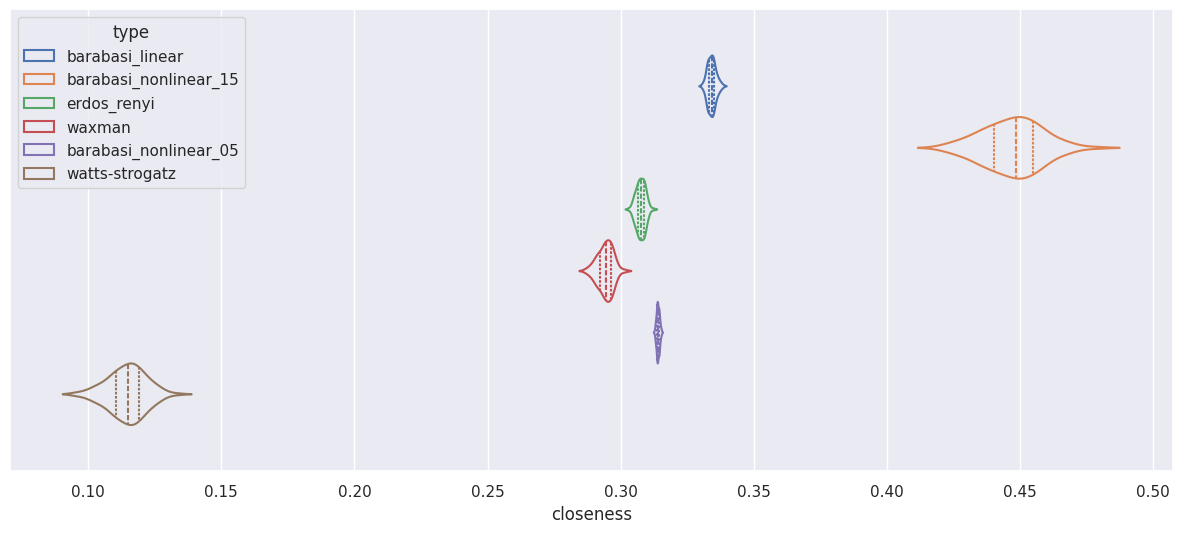

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="closeness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Betweenness

This graph shows clearly the disparity of Watts-Strogatz networks to have higher nodes that are present in Shortest Path Lenghts

<Axes: xlabel='betweenness'>

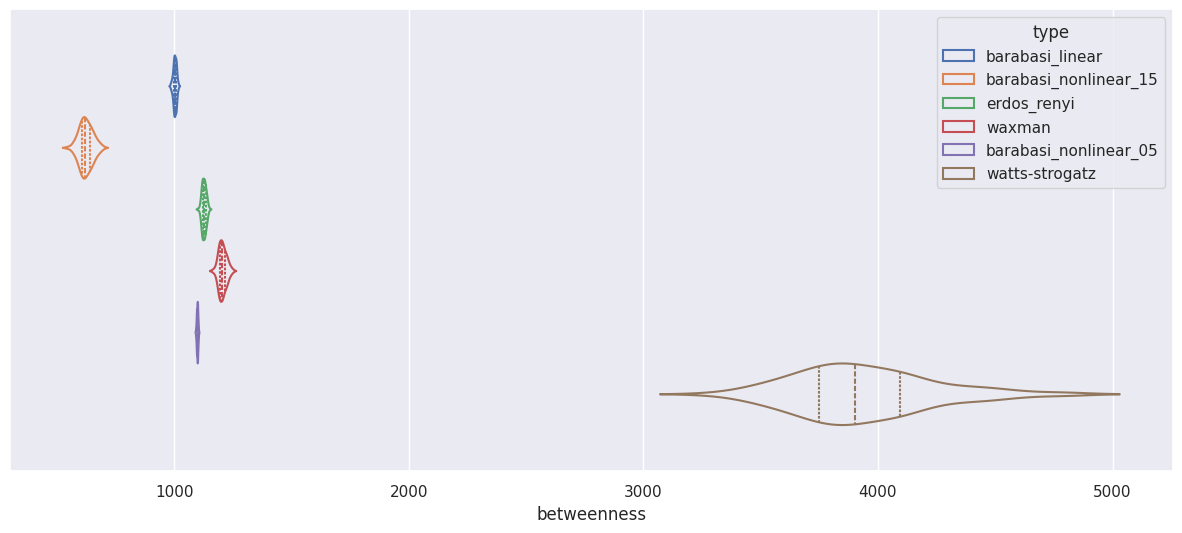

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="betweenness", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Average Shortest Path Lenght
Watts-Strogatz is also the networks with higher Average Shortest Path Lenght

<Axes: xlabel='average_shortest_path_lenght'>

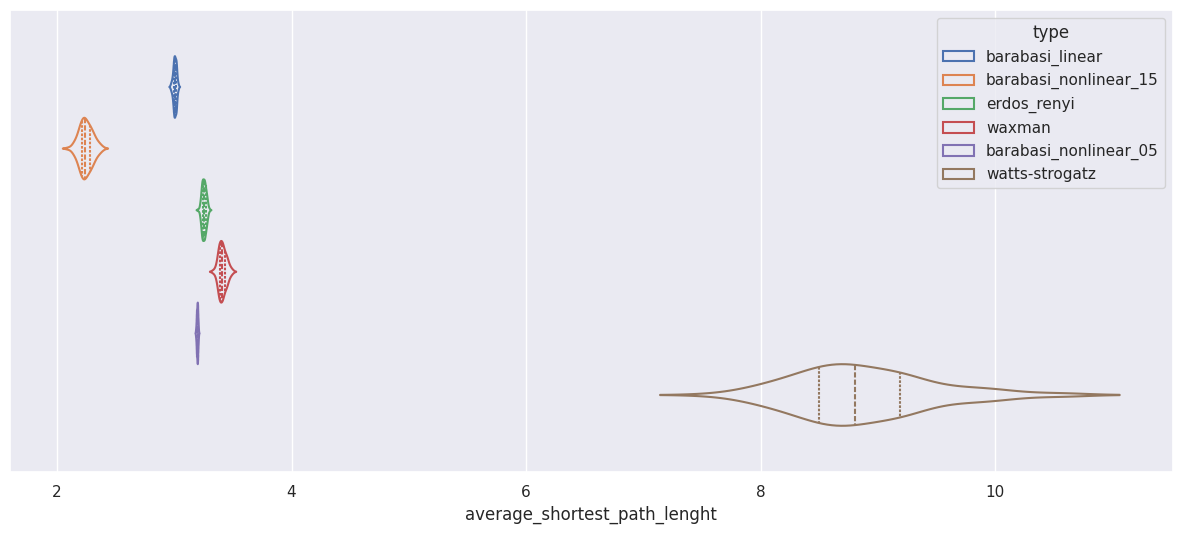

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="average_shortest_path_lenght", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Shannon Entropy

<Axes: xlabel='shannon_entropy'>

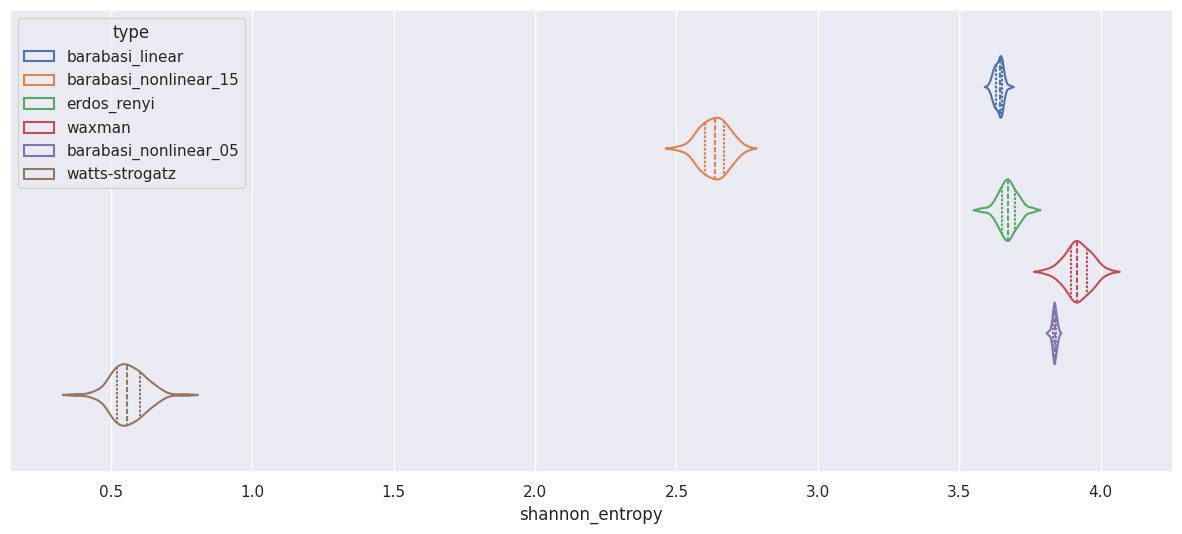

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="shannon_entropy", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Degree Variance

<Axes: xlabel='degree_variance'>

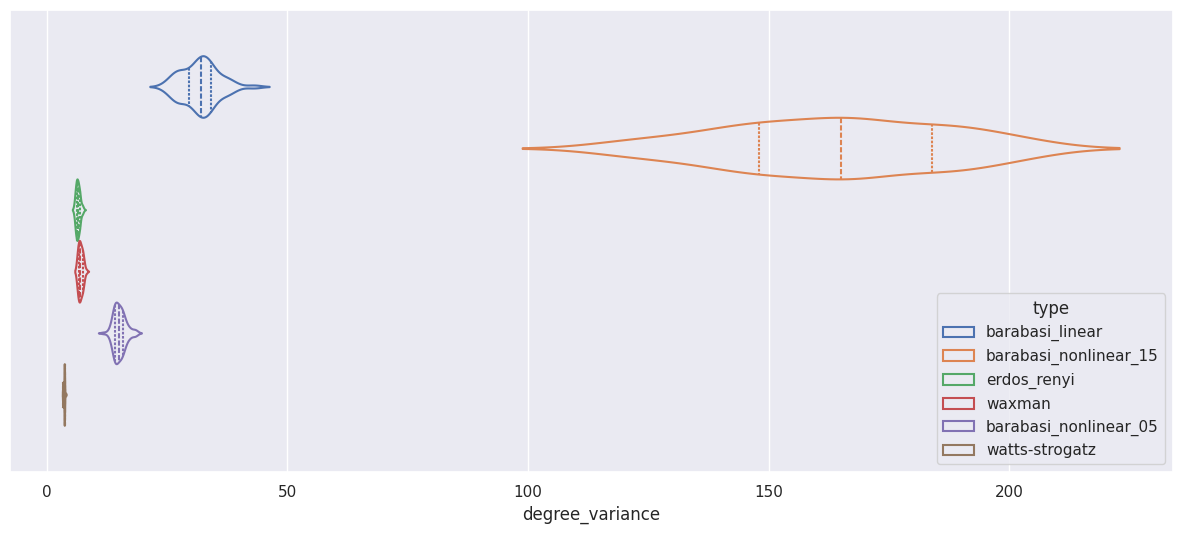

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="degree_variance", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Eigenvector

<Axes: xlabel='eigenvector'>

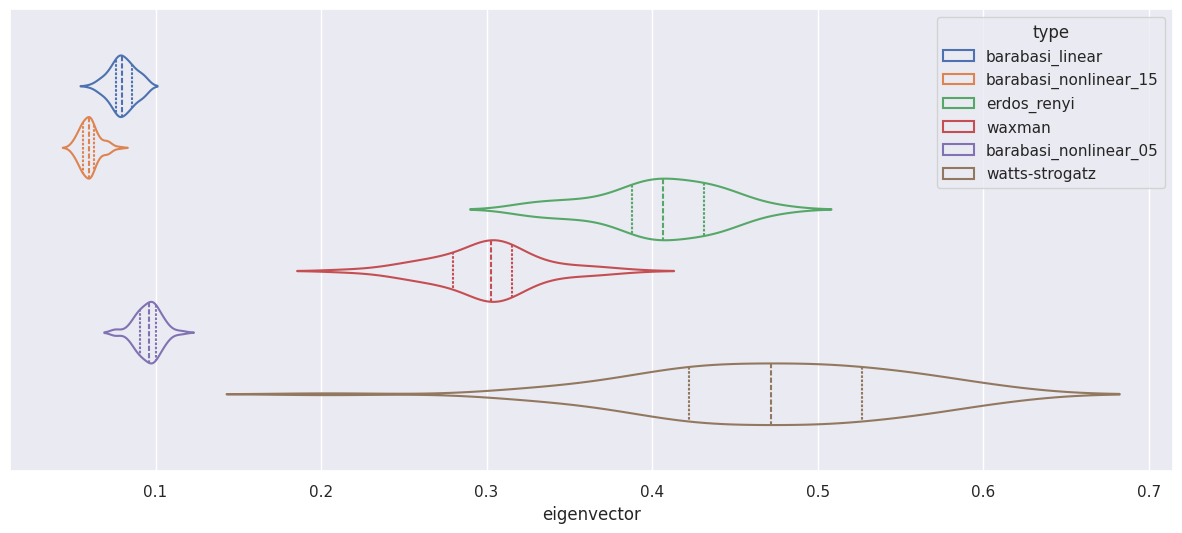

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="eigenvector", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Information Centrality
Centralidade de Informacao

<Axes: xlabel='information_centrality'>

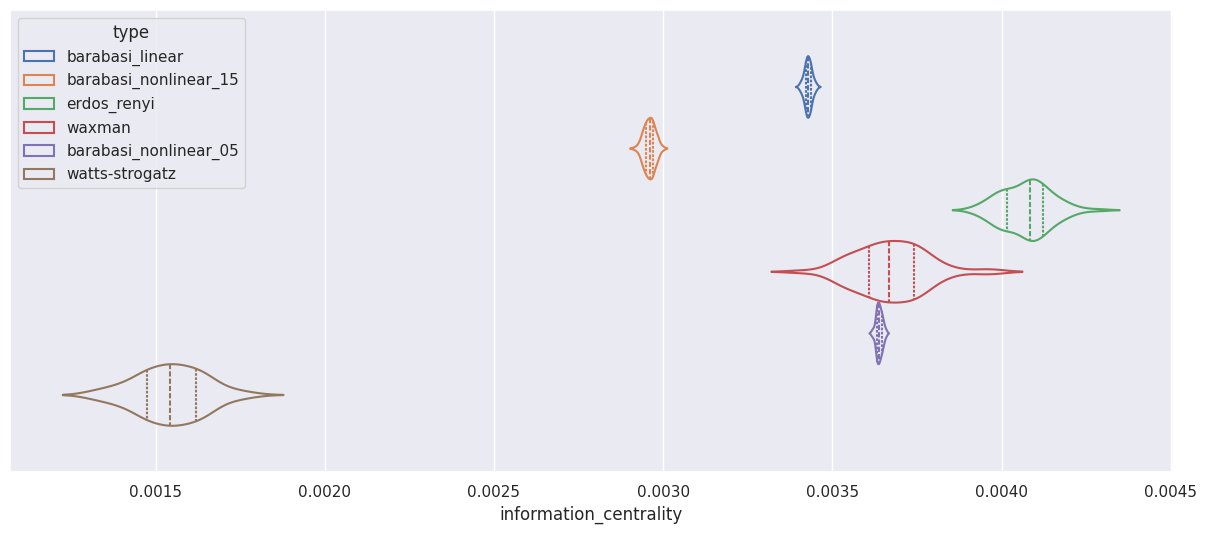

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="information_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

### Approximate Current Flow Betweenness Centrality

<Axes: xlabel='approximate_current_flow_betweenness_centrality'>

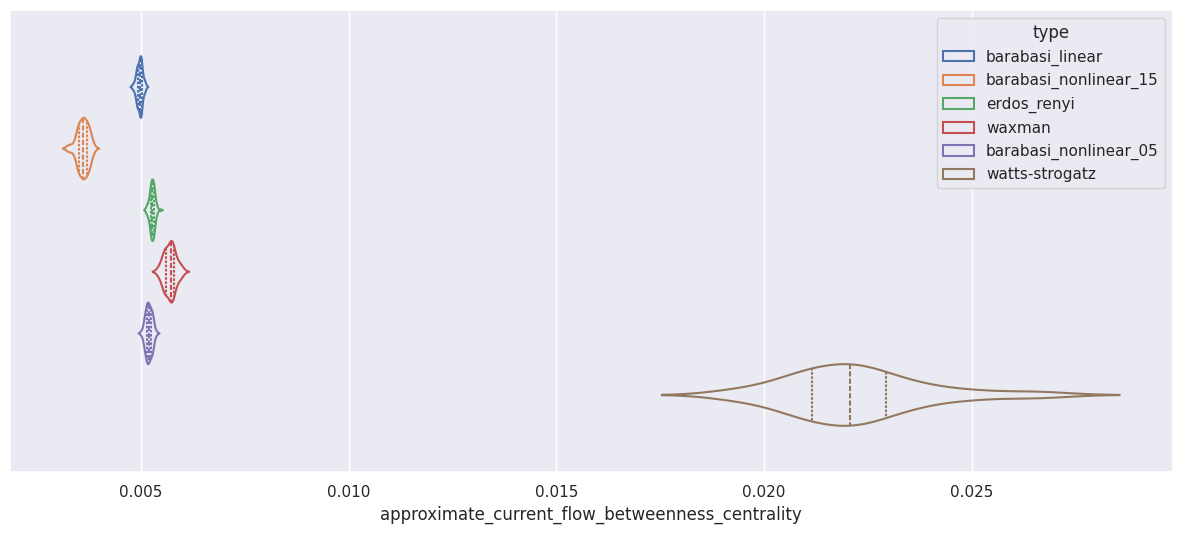

In [ ]:
sns.violinplot(
    data=measures_df, 
    x="approximate_current_flow_betweenness_centrality", 
    hue="type", 
    inner='quart',
    fill=False,
)

## Network Metrics for each Initialization

In [ ]:
sns.set_theme()

In [ ]:
np.unique(dataset['type'])

array(['barabasi_linear', 'barabasi_nonlinear_05',
       'barabasi_nonlinear_15', 'erdos_renyi', 'watts-strogatz', 'waxman'],
      dtype=object)

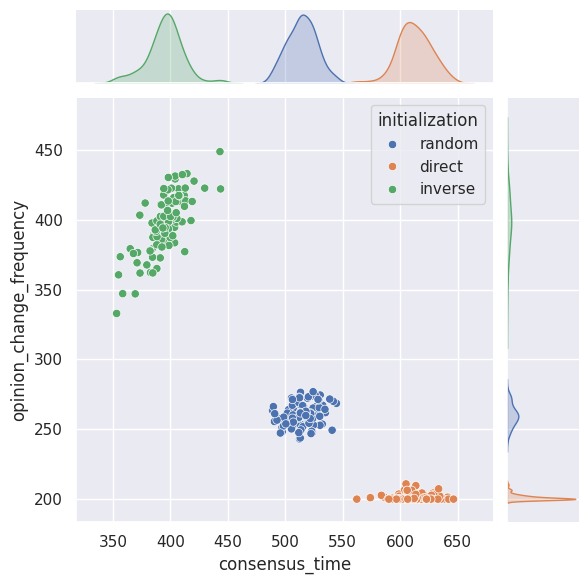

In [ ]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_05'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
    # kind="kde",
)

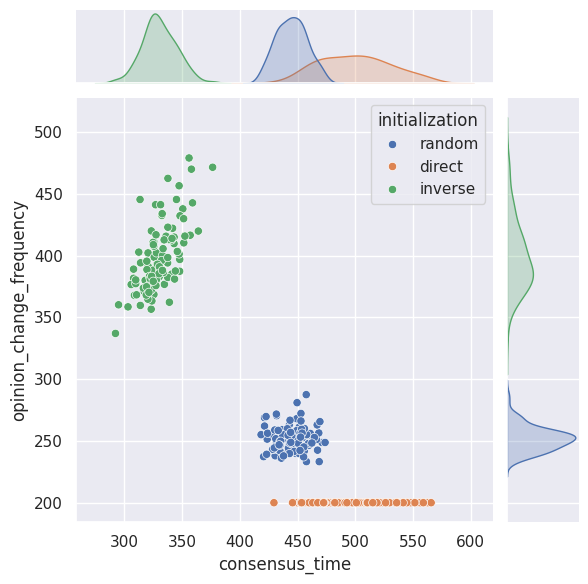

In [ ]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_linear'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

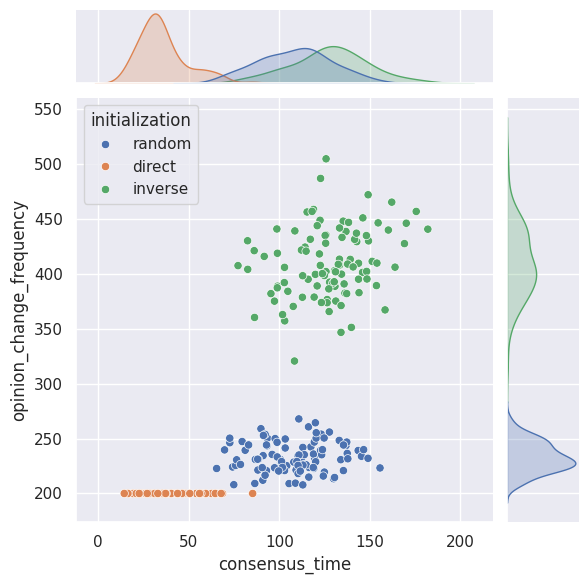

In [ ]:
sns.jointplot(
    data=dataset[dataset['type'] == 'barabasi_nonlinear_15'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

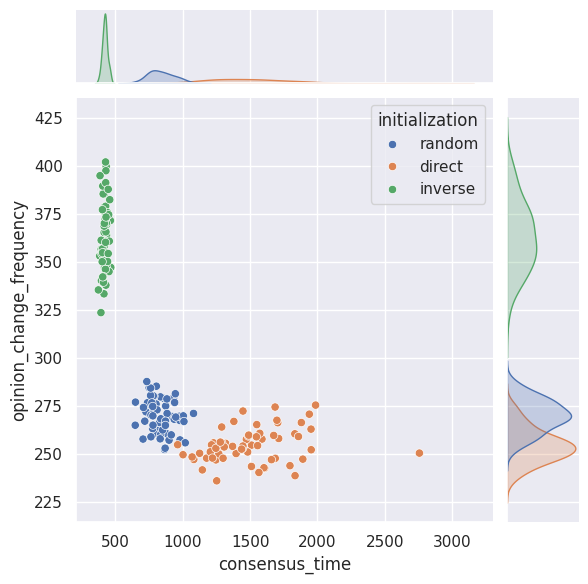

In [ ]:
sns.jointplot(
    data=dataset[dataset['type'] == 'waxman'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

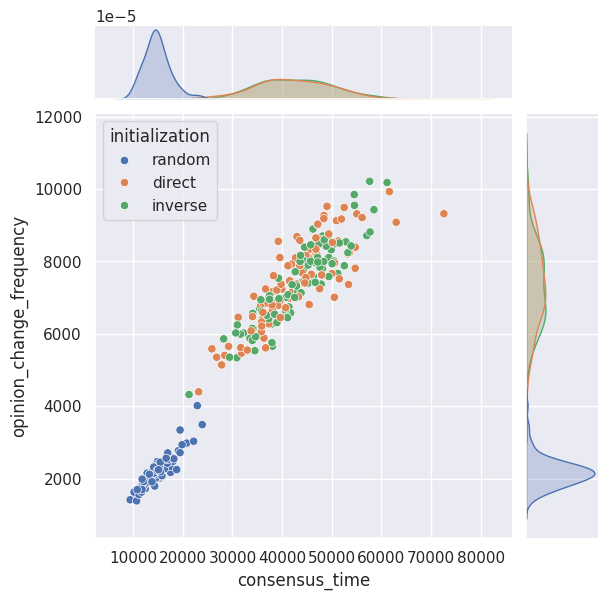

In [ ]:
sns.jointplot(
    data=dataset[dataset['type'] == 'watts-strogatz'],
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)

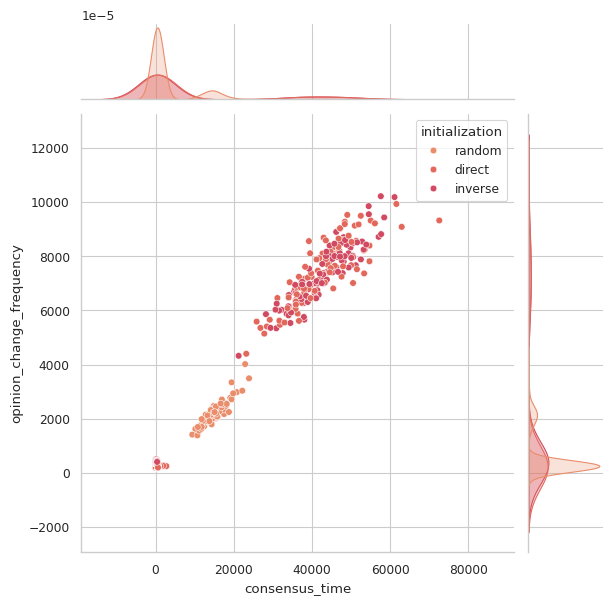

In [6]:
sns.jointplot(
    data=dataset,
    x="consensus_time", y="opinion_change_frequency", hue="initialization",
)